<a href="https://colab.research.google.com/github/muntazir02/maven/blob/main/muntazir_nlp_module_0_airline_tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignement Submission by Muntazir Mehdi

## Twitter Sentiment Analysis

**Problem statement:** Airline industry had a very hard time post covid to sustain their business due to a long hault. It is very important for them to make sure they exceed customer expectations. The best way to evaluate performance is customer feedback. You are given a dataset of airline tweets from real customers.

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

You will use the text column and sentiment column to create a classification model that classifies a given tweet into one of the 3 classes - positive, negative, neutral.

**Understanding the Dataset:**

Dataset contains many columns out of which below are most important ones-
1. airline_sentiment - defines the sentiment of the tweet 
2. negative_reason - reason for the negative feedback (if negative)
3. Text - tweet text content
4. tweet_location - location from which tweet was posted

You can use more columns in your model training if you want. 


**Steps to perform**
1. Load dataset - https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
2. Clean, preprocess data and EDA
3. Vectorise columns that contain text 
4. Run Classification model to classify - positive, negative or neutral
5. Evaluate model



## Steps to Download kaggle datasets using Kaggle Public API

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Loading Data

In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip twitter-airline-sentiment.zip

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 189MB/s]
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv('Tweets.csv')
data.head(5)

In [ ]:
# Load the Database, find the name of tables inside
import sqlite3
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT Name FROM sqlite_master WHERE type='table'")
results = cursor.fetchall()
print(results)

[('Tweets',)]


In [ ]:
cursor.execute("SELECT * FROM Tweets limit 10")
results = cursor.fetchall()
for row in results:
    print(row)

(567588278875213824, 'neutral', 1, '', '', 'Delta', '', 'JetBlueNews', '', 0, "@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch", '', '2015-02-16 23:36:05 -0800', 'USA', 'Sydney')
(567590027375702016, 'negative', 1, "Can't Tell", 0.6503, 'Delta', '', 'nesi_1992', '', 0, '@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy', '', '2015-02-16 23:43:02 -0800', 'undecided', 'Pacific Time (US & Canada)')
(567591480085463040, 'negative', 1, 'Late Flight', 0.34600000000000003, 'United', '', 'CPoutloud', '', 0, '@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.', '', '2015-02-16 23:48:48 -0800', 'Washington, DC', '')
(567592368451248130, 'negative', 1, 'Late Flight', 1, 'United', '', 'brenduch', '', 0, '@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait', '', 

<Axes: xlabel='airline_sentiment', ylabel='count'>

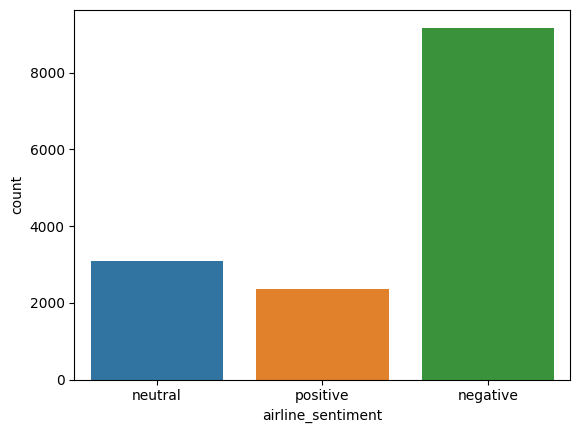

In [ ]:
sns.countplot(x = "airline_sentiment", data = data)

# Basic Text Processing

In [ ]:
# Drop unrequired columns
waste_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']
data = data.drop(waste_col, axis = 1)